In [1]:
import pandas as pd
import numpy as np
import os
import glob

In [2]:
folder_path = '/Users/mt/Desktop/africa_conflict/data'
filenames = []
for root, directories, files in os.walk(folder_path, topdown=False):
    for name in files:
        filenames.append(os.path.join(root, name))
# filenames

In [3]:
world_data_file =pd.read_csv('/Users/mt/Desktop/africa_conflict/data/2018-09-10-2021-09-17 (1).csv')
world_data_file.head(5)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,8539136,840,USA34395,34395,10 September 2021,2021,1,Protests,Peaceful protest,Protesters (United States),...,Richmond,39.8289,-84.8902,1,Palladium-Item,Subnational,"On 10 September 2021, about 40 people gathered...",0,1631649215,USA
1,8537603,104,MMR21818,21818,10 September 2021,2021,1,Protests,Peaceful protest,Protesters (Myanmar),...,Yangon,16.8052,96.1561,2,Democratic Voice of Burma,National,"On 10 September 2021, in Yangon city (Yangon r...",0,1631628806,MMR
2,8533252,710,SAF15534,15534,10 September 2021,2021,1,Protests,Peaceful protest,Protesters (South Africa),...,Southernwood,-33.0022,27.9025,1,Daily Dispatch,Subnational,"On 10 September 2021, a group took to the stre...",0,1631568160,ZAF
3,8538628,268,GEO3242,3242,10 September 2021,2021,1,Protests,Protest with intervention,Protesters (Georgia),...,Batumi,41.6423,41.6339,1,Mtavari Arkhi,National,"On 10 September 2021, truck drivers organized ...",0,1631646932,GEO
4,8532229,484,MEX50491,50491,10 September 2021,2021,1,Strategic developments,Arrests,Police Forces of Mexico (2018-),...,Los Reyes Acaquilpan,19.3584,-98.9766,2,La Silla Rota; Milenio,National,"On 10 September 2021, close to Los Reyes Acaqu...",0,1631552922,MEX


In [4]:
world_data = world_data_file.copy()

In [5]:
congo_data = world_data.loc[world_data['country']=='Democratic Republic of Congo']
congo_data['event_type'].unique()

array(['Riots', 'Violence against civilians', 'Battles',
       'Strategic developments', 'Protests', 'Explosions/Remote violence'],
      dtype=object)

In [6]:
africa_conflicts = pd.read_excel('/Users/mt/Desktop/africa_conflict/data/Africa_1997-2021_Sep10 copy.xlsx')

In [7]:
africa_conflicts = africa_conflicts.copy()

In [8]:
congo = africa_conflicts.loc[africa_conflicts['COUNTRY'] == 'Democratic Republic of Congo']
congo.head(5)

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
37390,180,DRC65,65,1997-02-27,1997,1,Battles,Non-state actor overtakes territory,ADFL: Alliance of Democratic Forces for Libera...,NaN,...,NaN,Kindu,-2.944,25.922,1,Reuters,International,ADLF rebels take control of the town of Kindu ...,0,1618597687
37391,180,DRC66,66,1997-02-28,1997,1,Strategic developments,Change to group/activity,ADFL: Alliance of Democratic Forces for Libera...,NaN,...,NaN,Kisangani,0.515,25.190,1,Local Source,Subnational,Movement of forces: Rebels nearing Kisangani n...,0,1618597687
37392,180,DRC67,67,1997-02-28,1997,1,Battles,Armed clash,ADFL: Alliance of Democratic Forces for Libera...,NaN,...,NaN,Kisangani,0.515,25.190,1,All Africa,Regional,ADLF rebels claim to have shot down Zaire arme...,0,1618597687
37393,180,DRC68,68,1997-03-01,1997,1,Battles,Non-state actor overtakes territory,ADFL: Alliance of Democratic Forces for Libera...,NaN,...,NaN,Kanamononga,-8.812,24.560,1,Africa Confidential; Africa Contemporary Record,Other-Regional,NaN,0,1618597687
37394,180,DRC69,69,1997-03-01,1997,1,Battles,Non-state actor overtakes territory,ADFL: Alliance of Democratic Forces for Libera...,NaN,...,NaN,Kindu,-2.944,25.922,1,Africa Contemporary Record; Africa Confidential,Other-Regional,NaN,0,1618597687


In [9]:
missing_values_col = congo.isna().sum() / congo.shape[0]*100
missing_values_col 

ISO                  0.000000
EVENT_ID_CNTY        0.000000
EVENT_ID_NO_CNTY     0.000000
EVENT_DATE           0.000000
YEAR                 0.000000
TIME_PRECISION       0.000000
EVENT_TYPE           0.000000
SUB_EVENT_TYPE       0.000000
ACTOR1               0.000000
ASSOC_ACTOR_1       81.463078
INTER1               0.000000
ACTOR2              13.558776
ASSOC_ACTOR_2       81.656315
INTER2               0.000000
INTERACTION          0.000000
REGION               0.000000
COUNTRY              0.000000
ADMIN1               0.000000
ADMIN2               3.303428
ADMIN3              41.472280
LOCATION             0.000000
LATITUDE             0.000000
LONGITUDE            0.000000
GEO_PRECISION        0.000000
SOURCE               0.000000
SOURCE_SCALE         0.000000
NOTES                2.475270
FATALITIES           0.000000
TIMESTAMP            0.000000
dtype: float64

In [10]:
new_congo_data = congo[['EVENT_DATE','YEAR','EVENT_TYPE','SUB_EVENT_TYPE','ACTOR1','ACTOR2','ADMIN1','ADMIN2','LOCATION','LATITUDE','LONGITUDE','SOURCE','NOTES','FATALITIES']]

In [11]:
new_congo_data.columns.str.lower()

Index(['event_date', 'year', 'event_type', 'sub_event_type', 'actor1',
       'actor2', 'admin1', 'admin2', 'location', 'latitude', 'longitude',
       'source', 'notes', 'fatalities'],
      dtype='object')

In [12]:
new_congo_data.columns = new_congo_data.columns.str.lower()

In [13]:
new_congo_data

,event_date,year,event_type,sub_event_type,actor1,actor2,admin1,admin2,location,latitude,longitude,source,notes,fatalities
37390,1997-02-27,1997,Battles,Non-state actor overtakes territory,ADFL: Alliance of Democratic Forces for Libera...,Military Forces of the Democratic Republic of ...,Maniema,Kindu,Kindu,-2.944,25.922,Reuters,ADLF rebels take control of the town of Kindu ...,0
37391,1997-02-28,1997,Strategic developments,Change to group/activity,ADFL: Alliance of Democratic Forces for Libera...,NaN,Tshopo,Kisangani,Kisangani,0.515,25.190,Local Source,Movement of forces: Rebels nearing Kisangani n...,0
37392,1997-02-28,1997,Battles,Armed clash,ADFL: Alliance of Democratic Forces for Libera...,Military Forces of the Democratic Republic of ...,Tshopo,Kisangani,Kisangani,0.515,25.190,All Africa,ADLF rebels claim to have shot down Zaire arme...,0
37393,1997-03-01,1997,Battles,Non-state actor overtakes territory,ADFL: Alliance of Democratic Forces for Libera...,Military Forces of the Democratic Republic of ...,Haut-Lomami,Kamina,Kanamononga,-8.812,24.560,Africa Confidential; Africa Contemporary Record,NaN,0
37394,1997-03-01,1997,Battles,Non-state actor overtakes territory,ADFL: Alliance of Democratic Forces for Libera...,Military Forces of the Democratic Republic of ...,Maniema,Kindu,Kindu,-2.944,25.922,Africa Contemporary Record; Africa Confidential,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59120,2021-09-10,2021,Violence against civilians,Attack,ADF: Allied Democratic Forces,Civilians (Democratic Republic of Congo),Nord-Kivu,Beni,Kainama,0.946,29.863,Radio Okapi; Actualite,"On 10 September 2021, the ADF attacked civilia...",0
59121,2021-09-10,2021,Battles,Armed clash,Military Forces of the Democratic Republic of ...,ADF: Allied Democratic Forces,Nord-Kivu,Beni,Kitsimba,0.912,29.838,Actualite; Radio Okapi,"On 10 September 2021, the FARDC clashed agains...",4
59122,2021-09-10,2021,Violence against civilians,Attack,Unidentified Armed Group (Democratic Republic ...,Civilians (Democratic Republic of Congo),Sud-Kivu,Fizi,Kabumbe,-3.643,29.149,Kivu Times,"On 10 September 2021, an unidentified armed gr...",0
59123,2021-09-10,2021,Battles,Armed clash,ADF: Allied Democratic Forces,Military Forces of the Democratic Republic of ...,Ituri,Irumu,Ndimo,1.116,29.628,Al Nabaa,"On 10 September 2021, the ADF attacked the FAR...",0


In [14]:
violence_1998 = new_congo_data.loc[new_congo_data['event_date'].dt.month == 7 & (new_congo_data['year'] == 1998)]
violence_1998.head(3)

,event_date,year,event_type,sub_event_type,actor1,actor2,admin1,admin2,location,latitude,longitude,source,notes,fatalities
37613,1998-01-05,1998,Battles,Armed clash,ADF-NALU: Allied Democratic Forces-National Ar...,Military Forces of Uganda (1986-),Sud-Kivu,Uvira,Kasenga,-3.357,29.150,Africa Contemporary Record; Africa Confidential,NaN,0
37614,1998-01-12,1998,Violence against civilians,Attack,Unidentified Armed Group (Democratic Republic ...,Civilians (Democratic Republic of Congo),Kinshasa,NaN,Kinshasa,-4.325,15.322,AP,An ICRC driver working in the Congolese capita...,1
37615,1998-01-12,1998,Violence against civilians,Attack,Unidentified Armed Group (Democratic Republic ...,Civilians (Democratic Republic of Congo),Kinshasa,NaN,Kinshasa,-4.325,15.322,Reuters,Unidentified armed man shoots and kills an Int...,1


In [15]:
violence_1998.describe()

,year,latitude,longitude,fatalities
count,12.0,12.000000,12.000000,12.000000
mean,1998.0,-3.605500,19.566167,1.166667
std,0.0,2.183082,7.348626,1.800673
min,1998.0,-5.837000,13.450000,0.000000
25%,1998.0,-4.703000,14.854000,0.000000
50%,1998.0,-4.325000,15.322000,0.500000
75%,1998.0,-2.694500,29.209750,1.250000
max,1998.0,0.641000,29.906000,6.000000


In [16]:
violence_1998['event_type'].unique()

array(['Battles', 'Violence against civilians', 'Strategic developments'],
      dtype=object)

In [17]:
violence_1998.groupby('event_type')['fatalities'].sum()

event_type
Battles                       6
Strategic developments        0
Violence against civilians    8
Name: fatalities, dtype: int64

In [18]:
violence_1998[violence_1998['event_type']=='Battles']

,event_date,year,event_type,sub_event_type,actor1,actor2,admin1,admin2,location,latitude,longitude,source,notes,fatalities
37613,1998-01-05,1998,Battles,Armed clash,ADF-NALU: Allied Democratic Forces-National Ar...,Military Forces of Uganda (1986-),Sud-Kivu,Uvira,Kasenga,-3.357,29.150,Africa Contemporary Record; Africa Confidential,NaN,0
37620,1998-01-21,1998,Battles,Armed clash,Military Forces of the Democratic Republic of ...,Military Forces of the Democratic Republic of ...,Kongo-Central,Matadi,Matadi,-5.837,13.450,AFP; AP,A shoot out between soldiers broke out on 21 a...,1
37621,1998-01-22,1998,Battles,Armed clash,Mutiny of Military Forces of the Democratic Re...,Military Forces of the Democratic Republic of ...,Kongo-Central,Matadi,Matadi,-5.837,13.450,Dow Jones International,Soldiers riot/mutiny over unpaid wages. Soldie...,3
37622,1998-01-22,1998,Battles,Armed clash,Military Forces of the Democratic Republic of ...,Military Forces of the Democratic Republic of ...,Kongo-Central,Matadi,Matadi,-5.837,13.450,AFP; AP,A shoot out between soldiers broke out on 21 a...,2
37623,1998-01-30,1998,Battles,Government regains territory,Military Forces of the Democratic Republic of ...,ADF: Allied Democratic Forces,Nord-Kivu,Oicha,Kamango,0.641,29.906,Xinhua,Uganda and DRC government troops have destroye...,0
37624,1998-01-30,1998,Battles,Government regains territory,Military Forces of the Democratic Republic of ...,ADF: Allied Democratic Forces,Nord-Kivu,Rutshuru,Bwera,-0.707,29.389,Xinhua,Uganda and DRC government troops have destroye...,0


In [19]:
violence_1998[violence_1998['event_type']=='Violence against civilians']

,event_date,year,event_type,sub_event_type,actor1,actor2,admin1,admin2,location,latitude,longitude,source,notes,fatalities
37614,1998-01-12,1998,Violence against civilians,Attack,Unidentified Armed Group (Democratic Republic ...,Civilians (Democratic Republic of Congo),Kinshasa,NaN,Kinshasa,-4.325,15.322,AP,An ICRC driver working in the Congolese capita...,1
37615,1998-01-12,1998,Violence against civilians,Attack,Unidentified Armed Group (Democratic Republic ...,Civilians (Democratic Republic of Congo),Kinshasa,NaN,Kinshasa,-4.325,15.322,Reuters,Unidentified armed man shoots and kills an Int...,1
37616,1998-01-17,1998,Violence against civilians,Attack,Police Forces of the Democratic Republic of Co...,Civilians (Democratic Republic of Congo),Kinshasa,NaN,Kinshasa,-4.325,15.322,Amnesty International,About 30 members of the UDPS were reportedly t...,0
37619,1998-01-21,1998,Violence against civilians,Attack,ADF: Allied Democratic Forces,Civilians (Uganda),Nord-Kivu,Rutshuru,Bwera,-0.707,29.389,New Vision (Uganda),Six Ugandan civilians in DRC were killed by AD...,6


In [20]:
violence_1998.groupby(['event_type','sub_event_type']).size()

event_type                  sub_event_type              
Battles                     Armed clash                     4
                            Government regains territory    2
Strategic developments      Arrests                         1
                            Other                           1
Violence against civilians  Attack                          4
dtype: int64

In [21]:
violence_1998.groupby(['event_date','event_type'])['fatalities'].size()

event_date  event_type                
1998-01-05  Battles                       1
1998-01-12  Violence against civilians    2
1998-01-17  Strategic developments        1
            Violence against civilians    1
1998-01-20  Strategic developments        1
1998-01-21  Battles                       1
            Violence against civilians    1
1998-01-22  Battles                       2
1998-01-30  Battles                       2
Name: fatalities, dtype: int64

In [22]:
violence = violence_1998.groupby(['event_type','sub_event_type']).size()
violence

event_type                  sub_event_type              
Battles                     Armed clash                     4
                            Government regains territory    2
Strategic developments      Arrests                         1
                            Other                           1
Violence against civilians  Attack                          4
dtype: int64

In [23]:
violence = violence_1998.groupby(['event_type','sub_event_type']).sum()
violence

year  latitude  \
event_type                 sub_event_type                                 
Battles                    Armed clash                   7992   -20.868   
                           Government regains territory  3996    -0.066   
Strategic developments     Arrests                       1998    -4.325   
                           Other                         1998    -4.325   
Violence against civilians Attack                        7992   -13.682   

                                                         longitude  fatalities  
event_type                 sub_event_type                                       
Battles                    Armed clash                      69.500           6  
                           Government regains territory     59.295           0  
Strategic developments     Arrests                          15.322           0  
                           Other                            15.322           0  
Violence against civilians Attack                           75.355           8

In [24]:
violence.head()

year  latitude  \
event_type                 sub_event_type                                 
Battles                    Armed clash                   7992   -20.868   
                           Government regains territory  3996    -0.066   
Strategic developments     Arrests                       1998    -4.325   
                           Other                         1998    -4.325   
Violence against civilians Attack                        7992   -13.682   

                                                         longitude  fatalities  
event_type                 sub_event_type                                       
Battles                    Armed clash                      69.500           6  
                           Government regains territory     59.295           0  
Strategic developments     Arrests                          15.322           0  
                           Other                            15.322           0  
Violence against civilians Attack                           75.355           8

In [25]:
violence = pd.DataFrame(violence)

In [26]:
violence.columns

Index(['year', 'latitude', 'longitude', 'fatalities'], dtype='object')

In [27]:
violence_1998.groupby(['location'])['fatalities'].sum()

location
Bwera       6
Kamango     0
Kasenga     0
Kinshasa    2
Matadi      6
Name: fatalities, dtype: int64

In [28]:
violence_1998.groupby(['location','fatalities']).sum()

year  latitude  longitude
location fatalities                           
Bwera    0           1998    -0.707     29.389
         6           1998    -0.707     29.389
Kamango  0           1998     0.641     29.906
Kasenga  0           1998    -3.357     29.150
Kinshasa 0           5994   -12.975     45.966
         1           3996    -8.650     30.644
Matadi   1           1998    -5.837     13.450
         2           1998    -5.837     13.450
         3           1998    -5.837     13.450

In [29]:
congo_events = violence_1998.groupby('event_type').sum().reset_index()
#create a columns that count the numbers of conflicts
conflict = dict(violence_1998.event_type.value_counts())
congo_events['conflicts'] = congo_events['event_type'].map(conflict)

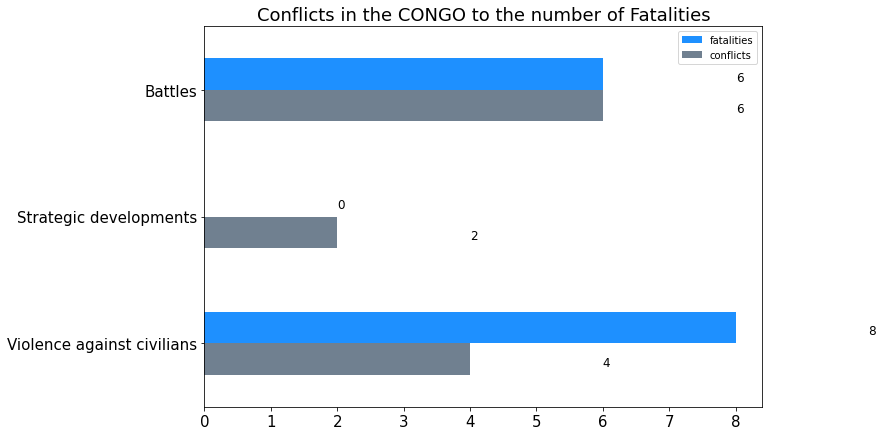

In [30]:
ax = congo_events[['fatalities','conflicts']].plot(kind = 'barh',
                figsize = (10,7), color =['dodgerblue','slategray'], fontsize =15)
ax.set_alpha(0.8)
ax.set_title("Conflicts in the CONGO to the number of Fatalities", fontsize=18)
ax.set_yticklabels(congo_events.event_type.values)
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+.18, \
           str(round((i.get_width()),2)), fontsize=12, color ='black')
ax.invert_yaxis()



In [31]:
# Rows with at least one NaN value
violence_1998[pd.isnull(violence_1998).any(axis=1)].head()

,event_date,year,event_type,sub_event_type,actor1,actor2,admin1,admin2,location,latitude,longitude,source,notes,fatalities
37613,1998-01-05,1998,Battles,Armed clash,ADF-NALU: Allied Democratic Forces-National Ar...,Military Forces of Uganda (1986-),Sud-Kivu,Uvira,Kasenga,-3.357,29.150,Africa Contemporary Record; Africa Confidential,NaN,0
37614,1998-01-12,1998,Violence against civilians,Attack,Unidentified Armed Group (Democratic Republic ...,Civilians (Democratic Republic of Congo),Kinshasa,NaN,Kinshasa,-4.325,15.322,AP,An ICRC driver working in the Congolese capita...,1
37615,1998-01-12,1998,Violence against civilians,Attack,Unidentified Armed Group (Democratic Republic ...,Civilians (Democratic Republic of Congo),Kinshasa,NaN,Kinshasa,-4.325,15.322,Reuters,Unidentified armed man shoots and kills an Int...,1
37616,1998-01-17,1998,Violence against civilians,Attack,Police Forces of the Democratic Republic of Co...,Civilians (Democratic Republic of Congo),Kinshasa,NaN,Kinshasa,-4.325,15.322,Amnesty International,About 30 members of the UDPS were reportedly t...,0
37617,1998-01-17,1998,Strategic developments,Other,Police Forces of the Democratic Republic of Co...,Civilians (Democratic Republic of Congo),Kinshasa,NaN,Kinshasa,-4.325,15.322,AFP,Non-violent activity: Police barred opposition...,0


In [32]:
violence_1998_notes = violence_1998[['notes']]

In [33]:
violence_1998_notes.head(3)

,notes
37613,NaN
37614,An ICRC driver working in the Congolese capita...
37615,Unidentified armed man shoots and kills an Int...


In [34]:
violence_1998_notes.to_csv('violence_1998_notes.csv')

In [35]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import random
pd.options.display.max_colwidth = 100

https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/11-Topic-Modeling-Time-Series.html

In [36]:
violence_1998_notes.dtypes

notes    object
dtype: object

In [37]:
violence1998_copy = violence_1998_notes.copy()

In [38]:
violence1998 = violence_1998.groupby(['sub_event_type','year'])['fatalities'].sum().reset_index()
conflict = dict(violence1998.sub_event_type.value_counts())
violence1998['conflicts'] = violence1998['sub_event_type'].map(conflict)
violence1998

,sub_event_type,year,fatalities,conflicts
0,Armed clash,1998,6,1
1,Arrests,1998,0,1
2,Attack,1998,8,1
3,Government regains territory,1998,0,1
4,Other,1998,0,1


In [39]:
violence1998 = violence_1998.groupby(['sub_event_type','event_date'])['fatalities'].sum().reset_index()
conflict = dict(violence1998.sub_event_type.value_counts())
violence1998['conflicts'] = violence1998['sub_event_type'].map(conflict)
violence1998

,sub_event_type,event_date,fatalities,conflicts
0,Armed clash,1998-01-05,0,3
1,Armed clash,1998-01-21,1,3
2,Armed clash,1998-01-22,5,3
3,Arrests,1998-01-20,0,1
4,Attack,1998-01-12,2,3
5,Attack,1998-01-17,0,3
6,Attack,1998-01-21,6,3
7,Government regains territory,1998-01-30,0,1
8,Other,1998-01-17,0,1


In [40]:
violence_1998.actor1.value_counts()

Military Forces of the Democratic Republic of Congo (1997-2001)                                     4
Police Forces of the Democratic Republic of Congo (1997-2001)                                       3
Unidentified Armed Group (Democratic Republic of Congo)                                             2
ADF: Allied Democratic Forces                                                                       1
Mutiny of Military Forces of the Democratic Republic of Congo (1997-2001) (Banyamulenge Faction)    1
ADF-NALU: Allied Democratic Forces-National Army for the Liberation of Uganda                       1
Name: actor1, dtype: int64

In [41]:
violence_1998.actor2.unique()

array(['Military Forces of Uganda (1986-)',
       'Civilians (Democratic Republic of Congo)', 'Civilians (Uganda)',
       'Military Forces of the Democratic Republic of Congo (1997-2001)',
       'ADF: Allied Democratic Forces'], dtype=object)

In [42]:
#congolese_army
national_army = violence_1998.loc[violence_1998['actor1'] == 'Military Forces of the Democratic Republic of Congo (1997-2001)']
national_army

,event_date,year,event_type,sub_event_type,actor1,actor2,admin1,admin2,location,latitude,longitude,source,notes,fatalities
37620,1998-01-21,1998,Battles,Armed clash,Military Forces of the Democratic Republic of Congo (1997-2001),Military Forces of the Democratic Republic of Congo (1997-2001),Kongo-Central,Matadi,Matadi,-5.837,13.450,AFP; AP,A shoot out between soldiers broke out on 21 and 22 January in Matadi following a misunderstandi...,1
37622,1998-01-22,1998,Battles,Armed clash,Military Forces of the Democratic Republic of Congo (1997-2001),Military Forces of the Democratic Republic of Congo (1997-2001),Kongo-Central,Matadi,Matadi,-5.837,13.450,AFP; AP,A shoot out between soldiers broke out on 21 and 22 January in Matadi following a misunderstandi...,2
37623,1998-01-30,1998,Battles,Government regains territory,Military Forces of the Democratic Republic of Congo (1997-2001),ADF: Allied Democratic Forces,Nord-Kivu,Oicha,Kamango,0.641,29.906,Xinhua,Uganda and DRC government troops have destroyed six ADF rebel camp off the mpondwe/bwera border ...,0
37624,1998-01-30,1998,Battles,Government regains territory,Military Forces of the Democratic Republic of Congo (1997-2001),ADF: Allied Democratic Forces,Nord-Kivu,Rutshuru,Bwera,-0.707,29.389,Xinhua,Uganda and DRC government troops have destroyed six ADF rebel camp off the mpondwe/bwera border ...,0


In [43]:
#Number of conflict by non state Groups
non_state_groups = violence_1998.loc[(violence_1998['actor1'] !='Military Forces of the Democratic Republic of Congo (1997-2001)') &  (violence_1998['actor2'] != 'Military Forces of the Democratic Republic of Congo (1997-2001)')]
non_state_groups

,event_date,year,event_type,sub_event_type,actor1,actor2,admin1,admin2,location,latitude,longitude,source,notes,fatalities
37613,1998-01-05,1998,Battles,Armed clash,ADF-NALU: Allied Democratic Forces-National Army for the Liberation of Uganda,Military Forces of Uganda (1986-),Sud-Kivu,Uvira,Kasenga,-3.357,29.150,Africa Contemporary Record; Africa Confidential,NaN,0
37614,1998-01-12,1998,Violence against civilians,Attack,Unidentified Armed Group (Democratic Republic of Congo),Civilians (Democratic Republic of Congo),Kinshasa,NaN,Kinshasa,-4.325,15.322,AP,An ICRC driver working in the Congolese capital Kinshasa was shot dead by unidentified gunmen wh...,1
37615,1998-01-12,1998,Violence against civilians,Attack,Unidentified Armed Group (Democratic Republic of Congo),Civilians (Democratic Republic of Congo),Kinshasa,NaN,Kinshasa,-4.325,15.322,Reuters,Unidentified armed man shoots and kills an International Committee of the Red Cross (ICRC) emplo...,1
37616,1998-01-17,1998,Violence against civilians,Attack,Police Forces of the Democratic Republic of Congo (1997-2001),Civilians (Democratic Republic of Congo),Kinshasa,NaN,Kinshasa,-4.325,15.322,Amnesty International,"About 30 members of the UDPS were reportedly tortured, including with electroshock batons, after...",0
37617,1998-01-17,1998,Strategic developments,Other,Police Forces of the Democratic Republic of Congo (1997-2001),Civilians (Democratic Republic of Congo),Kinshasa,NaN,Kinshasa,-4.325,15.322,AFP,Non-violent activity: Police barred opposition leader Etienne Tshisekedi from holding a public m...,0
37618,1998-01-20,1998,Strategic developments,Arrests,Police Forces of the Democratic Republic of Congo (1997-2001),Civilians (Democratic Republic of Congo),Kinshasa,NaN,Kinshasa,-4.325,15.322,AP,Arrests: Police arrested the head of opposition party Innovative Forces for Union and Solidarity...,0
37619,1998-01-21,1998,Violence against civilians,Attack,ADF: Allied Democratic Forces,Civilians (Uganda),Nord-Kivu,Rutshuru,Bwera,-0.707,29.389,New Vision (Uganda),Six Ugandan civilians in DRC were killed by ADF rebel remnants in Bwera in Chuseke area of the R...,6


Text(0.5, 1.0, 'Fatalities btw Actors in RDC conflicts in 1998')

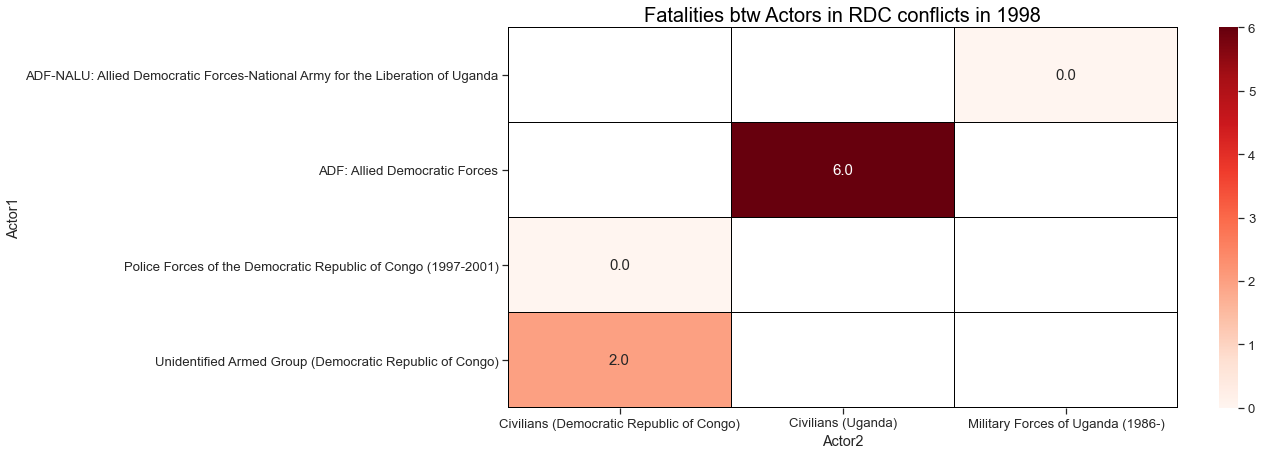

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
w_ang= non_state_groups.pivot_table(index='actor1',columns='actor2',values='fatalities',aggfunc='sum')
f, ax = plt.subplots(figsize=(15,7))
ax = sns.heatmap(w_ang, cmap ='Reds', linecolor = 'black', linewidths = 0.2, annot = True, fmt='.1f', annot_kws={'fontsize':15})
ax.set_xlabel('Actor2')
ax.set_ylabel('Actor1')
ax.set_title('Fatalities btw Actors in RDC conflicts in 1998',fontsize=20, color='black')

In [45]:
non_state_groups1998 = non_state_groups.groupby(['event_date','actor1'])['fatalities'].sum().reset_index()
conflict = dict(non_state_groups['actor1'].value_counts())
non_state_groups1998['conflicts'] =non_state_groups1998['actor1'].map(conflict)
non_state_groups1998

,event_date,actor1,fatalities,conflicts
0,1998-01-05,ADF-NALU: Allied Democratic Forces-National Army for the Liberation of Uganda,0,1
1,1998-01-12,Unidentified Armed Group (Democratic Republic of Congo),2,2
2,1998-01-17,Police Forces of the Democratic Republic of Congo (1997-2001),0,3
3,1998-01-20,Police Forces of the Democratic Republic of Congo (1997-2001),0,3
4,1998-01-21,ADF: Allied Democratic Forces,6,1


In [46]:
#Number of conflict event by non state actors



In [47]:
#Number of political event by interraction in ITuri



In [48]:
#Number of political violence events in DRC



In [49]:
#trend violence permonth 



In [50]:
#Number of political violence in 1998



What trends and patterns can you find when analyzing the ACLED data provided? How did you Analyze the Data? Provide a (very) brief description of the conflict dynamics for the time period / unit of analysis according to your findings

In [51]:
violence1998_copy['notes'] = violence1998_copy['notes'].astype(str)

In [52]:
path_to_mallet = '/Users/mt/Desktop/mallet-2.0.8/bin/mallet'

In [53]:
#Process the notes
training_data = [little_mallet_wrapper.process_string(notes, numbers='remove') for notes in violence1998_copy['notes']]
training_data

['nan',
 'icrc driver working congolese capital kinshasa shot dead unidentified gunmen stole car',
 'unidentified armed man shoots kills international committee red cross icrc employee stole vehicle',
 'members udps reportedly tortured including electroshock batons arrest january',
 'non violent activity police barred opposition leader etienne tshisekedi holding public meeting preventing members udsp entering party offices kinshasa reports violence',
 'arrests police arrested head opposition party innovative forces union solidarity office kinshasa second time three months amid government crackdown political parties',
 'six ugandan civilians drc killed adf rebel remnants bwera chuseke area rwenzori mountains',
 'shoot soldiers broke january matadi following misunderstanding soldiers officers fighting claimed lives two civilians one soldier around soldiers kinshasa deployed restore order',
 'soldiers riot/mutiny unpaid wages soldiers sent kinshasa stop rioting/fighting soldier casualties

In [54]:
#Get original notes
original_violence_notes = [title for title in violence1998_copy['notes']]
original_violence_notes

['nan',
 'An ICRC driver working in the Congolese capital Kinshasa was shot dead by unidentified gunmen who stole his car',
 'Unidentified armed man shoots and kills an International Committee of the Red Cross (ICRC) employee and then stole his vehicle.',
 'About 30 members of the UDPS were reportedly tortured, including with electroshock batons, after their arrest on 17 January',
 "Non-violent activity: Police barred opposition leader Etienne Tshisekedi from holding a public meeting by preventing some 100 members of the UDSP from entering the party's offices in Kinshasa. There were no reports of violence.",
 'Arrests: Police arrested the head of opposition party Innovative Forces for Union and Solidarity at his office in Kinshasa for the second time in three months, amid a government crackdown on political parties.',
 'Six Ugandan civilians in DRC were killed by ADF rebel remnants in Bwera in Chuseke area of the Rwenzori mountains',
 'A shoot out between soldiers broke out on 21 and 2

In [55]:
#Get Dataset Statistics
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 12
Mean Number of Words per Document: 15.4
Vocabulary Size: 118


In [56]:
#Training of Topic Model 
#set number of topics
num_topics = 12

In [57]:
#set training 
training_data = training_data

Set Other MALLET File Paths¶
Then we’re going to set a file path where we want all our MALLET topic modeling data to be dumped. I’m going to output everything onto my Desktop inside a folder called “topic-model-output” and a subfolder specific to the Reddit posts called “Reddit.”

All the other necessary variables below output_directory_path will be automatically created inside this directory.

In [58]:
# #Change to your desired output directory
output_directory_path = 'topic-model-output/violence_1998'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [59]:
#Train Topic Model¶
#Then we’re going to train our topic model with little_mallet_wrapper.quick_train_topic_model().

In [60]:
topic_keys, topic_distributions = little_mallet_wrapper.quick_train_topic_model(path_to_mallet, 
                                                              output_directory_path, 
                                                              num_topics, 
                                                              training_data)

Importing data...
Complete
Training topic model...
Complete


In [61]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)
for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['soldiers', 'claimed', 'officers', 'misunderstanding', 'following', 'civilian', 'casualties', 'rioting/fighting', 'riot/mutiny', 'chuseke', 'innovative', 'violence', 'man', 'unidentified', 'dead']

✨Topic 1✨

['mpondwe/bwera', 'deployed', 'lives', 'stole', 'order', 'remnants', 'time', 'congolese']

✨Topic 2✨

['kinshasa', 'around', 'troops', 'fighting', 'crackdown', 'entering', 'barred', 'vehicle', 'armed', 'unidentified', 'nan']

✨Topic 3✨

['two', 'matadi', 'reported', 'wages', 'unpaid', 'ugandan', 'amid', 'solidarity', 'activity', 'electroshock', 'shoots', 'capital']

✨Topic 4✨

['uganda', 'party', 'opposition', 'also', 'mountains', 'area', 'political', 'office', 'reports', 'violent', 'including', 'car']

✨Topic 5✨

['rwenzori', 'rebel', 'civilians', 'public', 'employee', 'red', 'gunmen']

✨Topic 6✨

['six', 'police', 'sent', 'order', 'adf', 'second', 'arrested', 'preventing', 'international']

✨Topic 7✨

['soldier', 'january', 'restore', 'shoot', 'etienne', 'arrest', 'b

In [62]:
#Load Topic Distributions
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [63]:
notes_dict = dict(zip(training_data, original_violence_notes))
notes_dict

{'nan': 'nan',
 'icrc driver working congolese capital kinshasa shot dead unidentified gunmen stole car': 'An ICRC driver working in the Congolese capital Kinshasa was shot dead by unidentified gunmen who stole his car',
 'unidentified armed man shoots kills international committee red cross icrc employee stole vehicle': 'Unidentified armed man shoots and kills an International Committee of the Red Cross (ICRC) employee and then stole his vehicle.',
 'members udps reportedly tortured including electroshock batons arrest january': 'About 30 members of the UDPS were reportedly tortured, including with electroshock batons, after their arrest on 17 January',
 'non violent activity police barred opposition leader etienne tshisekedi holding public meeting preventing members udsp entering party offices kinshasa reports violence': "Non-violent activity: Police barred opposition leader Etienne Tshisekedi from holding a public meeting by preventing some 100 members of the UDSP from entering the 

In [64]:
def display_top_notes_per_topic(topic_number = 0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")
    
    for probability,document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions,topic_number, n= number_of_documents):
        print(round(probability, 4), notes_dict[document] + "\n")
    
    return 



In [65]:
display_top_notes_per_topic(topic_number=4, number_of_documents=5)


✨Topic 4✨

['uganda', 'party', 'opposition', 'also', 'mountains', 'area', 'political', 'office', 'reports', 'violent', 'including', 'car']

0.1004 Non-violent activity: Police barred opposition leader Etienne Tshisekedi from holding a public meeting by preventing some 100 members of the UDSP from entering the party's offices in Kinshasa. There were no reports of violence.

0.1004 Arrests: Police arrested the head of opposition party Innovative Forces for Union and Solidarity at his office in Kinshasa for the second time in three months, amid a government crackdown on political parties.

0.0872 Six Ugandan civilians in DRC were killed by ADF rebel remnants in Bwera in Chuseke area of the Rwenzori mountains

0.0797 About 30 members of the UDPS were reportedly tortured, including with electroshock batons, after their arrest on 17 January

0.077 An ICRC driver working in the Congolese capital Kinshasa was shot dead by unidentified gunmen who stole his car



In [66]:
#Show Topic Words in Context of Full the notes¶

In [67]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):

        probability = f"✨✨✨\n\n**{probability}**"
        original_text = notes_dict[document]
        original_text_lowered = original_text.lower()
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text_lowered:
                original_text = re.sub(f"\\b{word}\\b", f"**{word.upper()}**", original_text, flags=re.I)

        display(Markdown(probability)), display(Markdown(original_text))

In [68]:
display_bolded_topic_words_in_context(topic_number=1, number_of_documents=5)


✨Topic 1✨

['mpondwe/bwera', 'deployed', 'lives', 'stole', 'order', 'remnants', 'time', 'congolese']



✨✨✨

**0.09194052112702829**

A shoot out between soldiers broke out on 21 and 22 January in Matadi following a misunderstanding between soldiers and their officers. The fighting claimed the **LIVES** of two civilians and one soldier. Around 200 soldiers from Kinshasa were **DEPLOYED** on 22 to restore **ORDER**.

✨✨✨

**0.09104403101384062**

An ICRC driver working in the **CONGOLESE** capital Kinshasa was shot dead by unidentified gunmen who **STOLE** his car

✨✨✨

**0.08193054772746522**

A shoot out between soldiers broke out on 21 and 22 January in Matadi following a misunderstanding between soldiers and their officers. The fighting claimed the **LIVES** of two civilians and one soldier. Around 200 soldiers from Kinshasa were **DEPLOYED** on 22 to restore **ORDER**.

✨✨✨

**0.07904139464901086**

Unidentified armed man shoots and kills an International Committee of the Red Cross (ICRC) employee and then **STOLE** his vehicle.

✨✨✨

**0.07904139464901086**

Six Ugandan civilians in DRC were killed by ADF rebel **REMNANTS** in Bwera in Chuseke area of the Rwenzori mountains